# Question: Do Race or Gender have an effect on Income?

This question has been asked many times with limited conclusive answers. There is clearly a divide based on raw data alone, but many individuals have tried to explain exactly why this is the case. In this project I hope to look into this question as well as certain assumptions that are made in trying to explain and justify this situation.

In [1]:
# import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# read in csv file 
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Let's look at the distribution of gender and race by group.

In [5]:
df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [6]:
df.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

# Education Levels

First, we need to look at education levels broken down by race and gender. In our society, it is expected that a greater amount of education will result in a better chance of earning more money.

Text(0, 0.5, 'Average Educational Number')

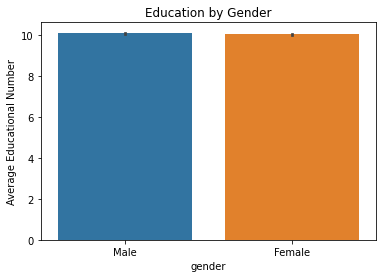

In [7]:
# plot bar chart of average education level by gender
ax = sns.barplot(data=df, x='gender', y='educational-num')
plt.title('Education by Gender')
plt.ylabel('Average Educational Number')

Text(0, 0.5, 'Average Educational Number')

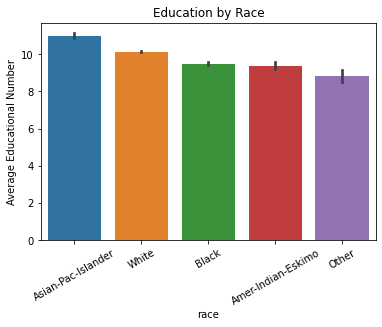

In [8]:
# sort df by race in descinding order of average educational number
group_order = df.groupby('race')['educational-num'].agg('mean').sort_values(ascending=False).index

# plot bar chart of education level by race
ax = sns.barplot(data=df, x='race', y='educational-num', order=group_order)
plt.title('Education by Race')
plt.xticks(rotation=30)
plt.ylabel('Average Educational Number')

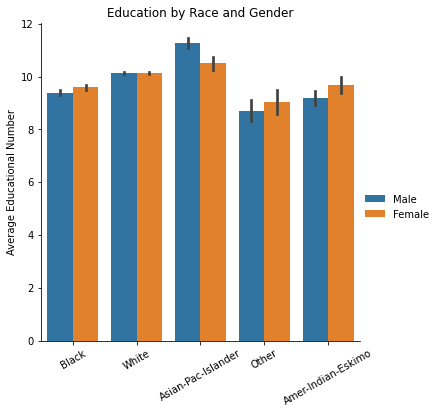

In [9]:
# plot education level broken down by race and gender
ax = sns.catplot(data=df, kind='bar', x='race', y='educational-num', hue='gender')
plt.title('Education by Race and Gender')
plt.ylabel('Average Educational Number')
plt.xlabel('')
plt.xticks(rotation=30)
ax.legend.set_title('')

This shows that women have slightly more education on average among Black, Amer-Indian-Eskimo, and Other races, while Asian-Pacific Islander and White men attain more education than women within the same race.

# Hours Worked Per Week

Now let's look at how many hours per week these people work. It would be good to know how often individuals work across the board regardless of race or gender first.

In [10]:
df['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

In [11]:
# calculate the number of individuals in each category to be put in the pie chart
s40 = df['hours-per-week'].loc[df['hours-per-week'] == 40].count()
s40less = df['hours-per-week'].loc[df['hours-per-week'] < 40].count()
s40more = df['hours-per-week'].loc[df['hours-per-week'] > 40].count()
print(s40, s40less, s40more)

22803 11687 14352


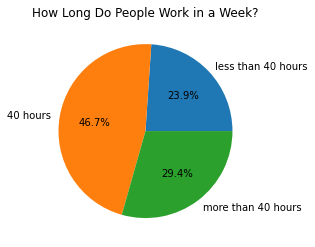

In [12]:
# plot pie chart of distribution of time spent working per week
labels = ['less than 40 hours', '40 hours', 'more than 40 hours']
sizes = [s40less, s40, s40more]
fig = plt.pie(sizes, labels=labels, autopct='%1.1f%%')
fig = plt.title('How Long Do People Work in a Week?')

Text(0, 0.5, 'Hours Per Week')

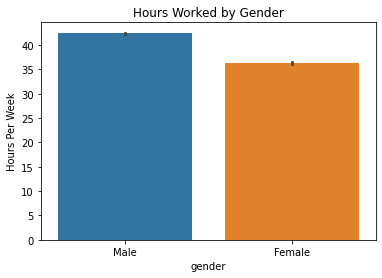

In [13]:
# plot hours per week worked by gender
ax = sns.barplot(data=df, x='gender', y='hours-per-week')
plt.title('Hours Worked by Gender')
plt.ylabel('Hours Per Week')

Text(0, 0.5, 'Hours Per Week')

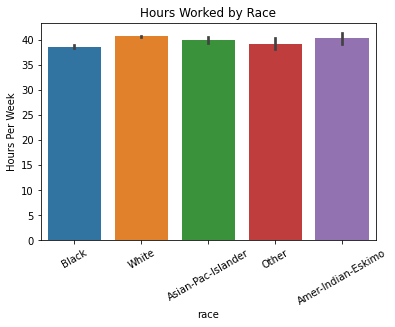

In [14]:
# plot hours per week worked by race
ax = sns.barplot(data=df, x='race', y='hours-per-week')
plt.title('Hours Worked by Race')
plt.xticks(rotation=30)
plt.ylabel('Hours Per Week')

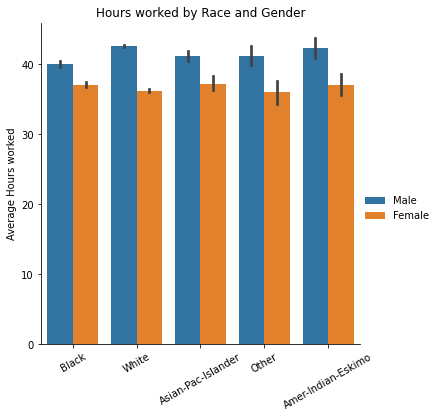

In [15]:
# plot hours per week worked broken down by race and gender
ax = sns.catplot(data=df, kind='bar', x='race', y='hours-per-week', hue='gender')
plt.title('Hours worked by Race and Gender')
plt.ylabel('Average Hours worked')
plt.xlabel('')
plt.xticks(rotation=30)
ax.legend.set_title('')

This chart reveals that men work more hours per week than woman regardless of race. It is interesting to note that white men work the most of any subgroup and white women work the least. 

# Income

So far we have a decent understanding of the amount of education as well as the amount of work that individuals do in a given week, broken down by race and gender. Now let's use this knowledge to assess income by race and gender.

In [16]:
# replace income with 0's and 1's
df.replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [17]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


Text(0, 0.5, '% Above $50K')

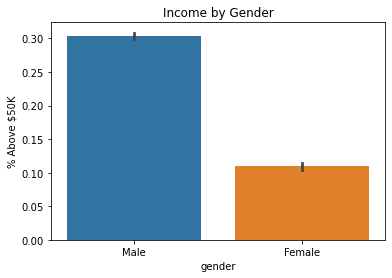

In [18]:
# plot income by gender
ax = sns.barplot(data=df, x='gender', y='income')
plt.title('Income by Gender')
plt.ylabel('% Above $50K')

Text(0, 0.5, '% Above $50K')

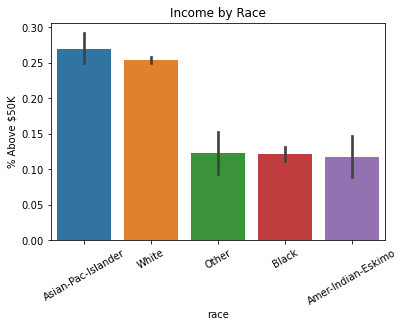

In [19]:
# sort df by race in descending order of average educational number
group_order2 = df.groupby('race')['income'].agg('mean').sort_values(ascending=False).index

# plot income by race
ax = sns.barplot(data=df, x='race', y='income', order=group_order2)
plt.title('Income by Race')
plt.xticks(rotation=30)
plt.ylabel('% Above $50K')

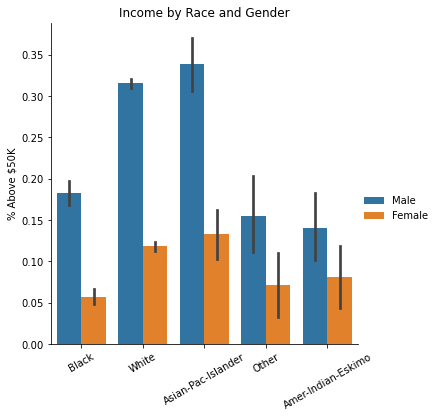

In [20]:
# plot high income rate broken down by race and gender
ax = sns.catplot(data=df, kind='bar', x='race', y='income', hue='gender')
plt.title('Income by Race and Gender')
plt.ylabel('% Above $50K')
plt.xlabel('')
plt.xticks(rotation=30)
ax.legend.set_title('')

We can seen that education levels are relatively equal among genders and slightly unequal among races. As for total amount of hours worked in a week, there is no discrepency among races, and a slight discrepency across the board for gender. However, when looking at income, the % of people making more than \\$50K a year is very different depending upon race and gender. It is also worth noting that the highest percentage of high earning women (Asian-Pacific-Islanders) are still below the lowest male race (American-Indian-Eskimo)

# Exploring Explanations

Moving on from here it is important to consider: What could possibly be causing these discrepencies besides simply straight bias. We can dig further into both gender and racial discrepencies. For gender, perhaps this discrepency is a result of women in child-bearing years being forced to leave their jobs to have children, and thus making less money. Maybe if we looked at women over 50, we would see shrinking gap, being that most women over 50 have moved passed raising their children.

As for race, it is also held that married individuals are seen to be more solidified and thus make more money than their unmarried, widowed, or divorced counterparts. Perhaps the reason that certain races earn less than other can be explained by the marriage rates among each race. We can look at only married individuals to see if the income gap shrinks.

In [21]:
# make dataframe with only individuals over 50 
df_fifty = df.loc[df['age'] >= 50]

Text(0, 0.5, '% Above $50K')

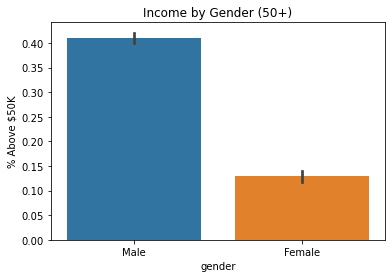

In [22]:
# plot income by gender of individuals over 50
ax = sns.barplot(data=df_fifty, x='gender', y='income')
plt.title('Income by Gender (50+)')
plt.ylabel('% Above $50K')

The above chart shows that 40% of men over 50 make more than \\$50K, while just 14% of women over 50 make more than $50K. Compare this to the unfiltered numbers, 30% of all men and 12% of all women make over \\$50K. Thus, women do not jump as high as men after 50.

In [23]:
# check out the value counts of marital-status column
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Text(0, 0.5, '% Above $50K')

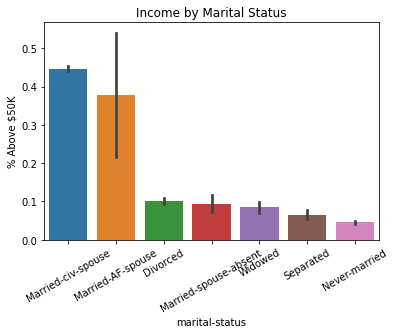

In [24]:
# sort df by marital status in descinding order of average educational number
group_order3 = df.groupby('marital-status')['income'].agg('mean').sort_values(ascending=False).index

# plot income by marital status
ax = sns.barplot(data=df, x='marital-status', y='income', order=group_order3)
plt.title('Income by Marital Status')
plt.xticks(rotation=30)
plt.ylabel('% Above $50K')

We see that marriage plays a huge role in whether or not an individual earns more than \\$50K a year. Perhaps if we looked at only married individuals, there would be no racial discrepency, and we could attribute the racial discrepencies to marriage imbalance among races.

In [25]:
# create dataframe comprised of only married individuals
df_married = df.loc[(df['marital-status'] == 'Married-civ-spouse') | (df['marital-status'] == 'Married-AF-spouse')]

Text(0, 0.5, '% Above $50K')

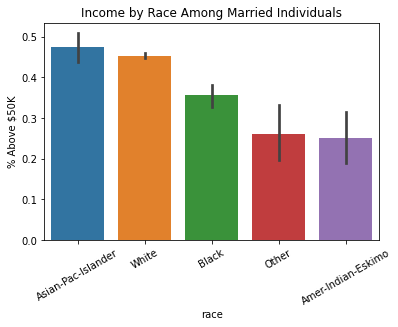

In [26]:
# sort df_married by race in descending order of average educational number
group_order4 = df_married.groupby('race')['income'].agg('mean').sort_values(ascending=False).index

ax = sns.barplot(data=df_married, x='race', y='income', order=group_order4)
plt.title('Income by Race Among Married Individuals')
plt.xticks(rotation=30)
plt.ylabel('% Above $50K')

It appears as though every race has a higher % of individuals making above \\$50K if we considered only married individuals. However, there is still a discrepency among Black, Amer-Indian-Eskimo, and Other races. 

# Conclusion

In conclusion, it is clear that there is a difference in income based on your race and gender, and this difference is not easily explained by common arguments like age and marital status. This analysis is incomplete given the sparseness of data (only 48,000 individuals) but it is a good start in showing that there is much more to racial and gender biases than just one or two factors.

# Further Analysis and Interesting Figures

<AxesSubplot:>

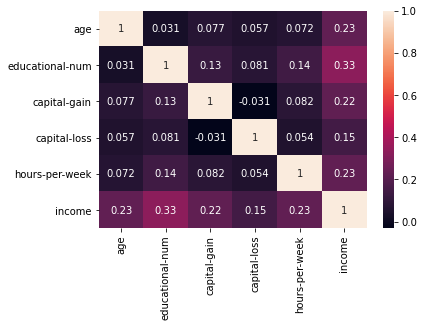

In [27]:
# explore correlations
sns.heatmap(df.drop('fnlwgt', axis=1).corr(), annot=True)

This correlation heatmap shows the most important variable in determining income. Income and Level of education are the most correlated features at 0.33, then age and hours worked per week with income are tied for second at 0.23.

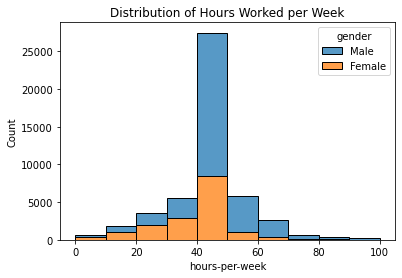

In [28]:
# plot histogram of hours per week worked broken up by gender
sns.histplot(data=df, x='hours-per-week', hue='gender', multiple='stack', binrange=(0,100), binwidth=10)
fig = plt.title('Distribution of Hours Worked per Week')

This chart shows that more women than men work less than 40 hours per week while more men than women work more than 40 hours per week. It is important to note that there are almost 2 times as many men as women in the dataset so the number of men and women working 40-50 hours a week (the most common range) is approximately proportional.